In [126]:
import functools
import itertools
import pathlib
import random
import time
import math
import re
import matplotlib.pyplot as plt 
from collections import Counter, defaultdict, namedtuple
from statistics  import mean, median, stdev
from typing      import Set, List, Tuple, Iterable, Dict

In [127]:
City = complex
Cities = frozenset
Tour = list
TSP = callable
Link = Tuple[City, City]

def distance(A: City, B: City) -> float: 
    "Distance between two cities"
    return abs(A - B)

def shortest(tours: Iterable[Tour]) -> Tour: 
    "The tour with the smallest tour length."
    return min(tours, key=tour_length)

def tour_length(tour: Tour) -> float:
    """The tour_length function calculates the total distance of a given tour, which is a sequence of cities. 
    This function is particularly useful in the context of the Traveling Salesman Problem (TSP), 
    where the goal is to determine the shortest possible route that visits each city exactly once 
    and returns to the starting city."""
    return sum(distance(tour[i], tour[i - 1]) for i in range(len(tour)))

def valid_tour(tour: Tour, cities: Cities) -> bool:
    """Does `tour` visit every city in `cities` exactly once?
       The valid_tour function is designed to determine if a given tour visits every city in the cities collection exactly once. 
       It takes two parameters: tour and cities, which are expected to be collections of cities. 
       The function returns a boolean value indicating whether the tour is valid.
    """
    return Counter(tour) == Counter(cities)

In [128]:
def random_cities(n, seed=1234, width=9999, height=6666) -> Cities:
    """Make a set of n cities, sampled uniformly from a (width x height) rectangle.
       The random_cities function generates a set of n cities, where each city is represented as a complex number. 
       These cities are sampled uniformly from a rectangular area defined by the given width and height parameters. 
       The function returns a Cities object, which is a frozenset of City objects.
    """
    random.seed(n, seed) # To make `random_cities` reproducible
    return Cities(City(random.randrange(width), random.randrange(height)) for c in range(n))

In [129]:
def exhaustive_tsp(cities) -> Tour:
    """
    The exhaustive_tsp function is designed to solve the Traveling Salesman Problem (TSP) 
    by generating all possible tours of a given set of cities and selecting the shortest one. 
    This approach is known as the exhaustive search method, as it evaluates every possible permutation 
    of the cities to find the optimal tour.
    """
    return shortest(possible_tours(cities))

possible_tours = itertools.permutations

In [130]:
n = 9
exhaustive_tsp(random_cities(9))

((6209+1387j),
 (9907+662j),
 (8237+3798j),
 (7585+5023j),
 (5472+4540j),
 (670+5965j),
 (105+2771j),
 (2269+1524j),
 (6116+2188j))

In [131]:
Segment = list

def plot_tour(tour: Tour, style='bo-', hilite='rs', title=''):
    scale = 1 + len(tour) ** 0.5 // 10
    plt.figure(figsize=(3*scale, 2*scale))
    start = tour[0]
    plot_segment([*tour, start], style)
    plot_segment([start], hilite)
    plt.title(title)

def Xs(cities) -> List[float]: "X coordinates"; return [c.real for c in cities]
def Ys(cities) -> List[float]: "Y coordinates"; return [c.imag for c in cities]

def plot_segment(segment: Segment, style='bo:'):
    "Plot every city and link in the segment."
    plt.plot(Xs(segment), Ys(segment), style, linewidth=2/3, markersize=4, clip_on=False)
    plt.axis('scaled'); plt.axis('off')


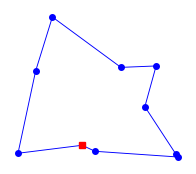

In [132]:
plot_tour(exhaustive_tsp(random_cities(10)))

In [147]:
def run(tsp: TSP, cities: Cities):
    """
        Run a TSP algorithm based on the choice made in callable, on a set of cities and plot/print the final graph.
    """
    t0 = time.perf_counter()
    tour = tsp(cities)
    t1 = time.perf_counter()
    L = tour_length(tour)
    print(f'length {round(L):,d} tour of {len(cities)} cities in {t1 - t0:.3f} secs')
    plot_tour(tour)

In [148]:
def possible_tours(cities) -> List[Tour]:
    "Return a list of non-redundant tours (permutations of cities with first city first)."
    start, *others = cities
    return [[start, *perm] for perm in itertools.permutations(others)]

length 22,476 tour of 10 cities in 0.997 secs


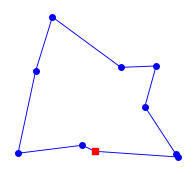

In [149]:
run(exhaustive_tsp, random_cities(10))

In [150]:
def nearest_tsp(cities, start=None) -> Tour:
    """Create a partial tour that initially is just the start city. 
    At each step extend the partial tour to the nearest unvisited neighbor 
    of the last city in the partial tour, while there are unvisited cities remaining."""
    start = start or first(cities)
    tour = [start]
    unvisited = set(cities) - {start}
    def extend_to(C): tour.append(C); unvisited.remove(C)
    while unvisited:
        extend_to(nearest_neighbor(tour[-1], unvisited))
    return tour

def first(collection): 
    """The first element of a collection."""
    return next(iter(collection))

def nearest_neighbor(A: City, cities) -> City:
    """Find the city C in cities that is nearest to city A."""
    return min(cities, key=lambda C: distance(C, A))

length 176,435 tour of 500 cities in 0.016 secs


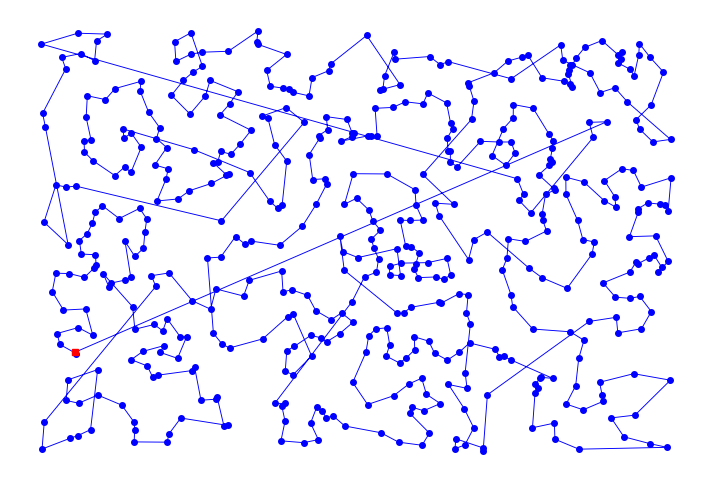

In [151]:
run(nearest_tsp, random_cities(500))

In [165]:
def rep_nearest_tsp(cities, k=20):
    "Repeat nearest_tsp starting from k different cities; pick the shortest tour."
    return shortest(nearest_tsp(cities, start) for start in sample(cities, k))

def sample(population, n, seed=23) -> Iterable:
    "Return a list of n elements sampled from population. Set random.seed."
    random.seed(n, seed)
    population = list(population)
    return random.sample(population, min(n, len(population)))

length 158,933 tour of 500 cities in 0.450 secs


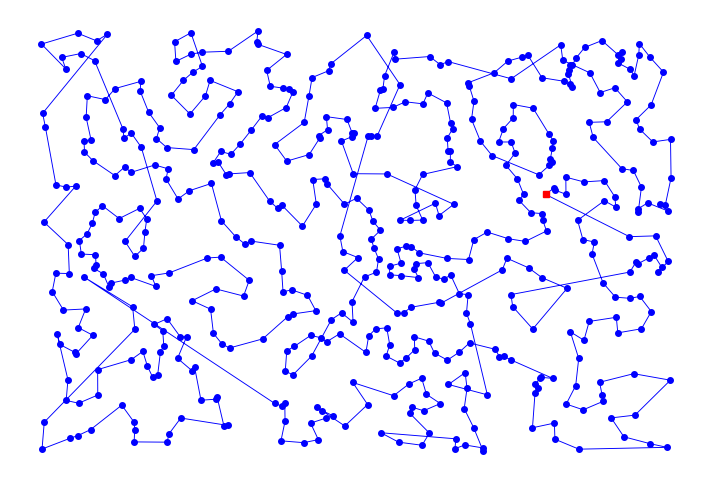

In [166]:
run(rep_nearest_tsp, random_cities(500))